In [1]:
!pip install -q keras
import keras

In [2]:
# importing the numpy package with the alias np
import numpy as np

# importing sequential model from keras.models
from keras.models import Sequential
# importing different layers and activations from keras.layers
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
# importing np_utils from keras.utils
from keras.utils import np_utils

# importing the mnist dataset from keras.datasets 
from keras.datasets import mnist

In [3]:
# we are downloading the MNIST dataset and splitting the data for training and testing
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


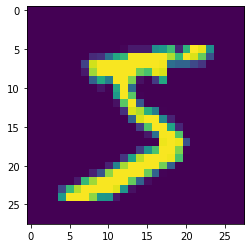

In [4]:

# printing out the shape of x_train
print (X_train.shape)

# importing pyplot with alias plt from matplotlib package
from matplotlib import pyplot as plt
# %matplotlib inline is a magic function to show us the plots in a notebook
%matplotlib inline
# plotting the first image or the image at index zero in the training dataset
plt.imshow(X_train[0])

In [5]:
#Reshaping our training and testing datatset using numpy's reshape function which we will feed to the model
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [6]:
#Doing type conversion or changing the datatype to float32 for the data
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
#Doing standardization or normalization here dividind each pixel by 255 in the train and test data
X_train /= 255
X_test /= 255

In [7]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
# simply we can say we are doing sort of onehot encoding
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [8]:
from keras.layers import Activation,BatchNormalization

#MODEL 1

In [9]:
model1 = Sequential()
# Performing 2dconvolution followed by BatchNormalization and Dropout
model1.add(Convolution2D(10, 3, activation='relu', input_shape=(28,28,1))) # channel dimensions = 26x26x10    
model1.add(BatchNormalization())
model1.add(Dropout(0.1))

# Performing 2dconvolution followed by BatchNormalization and Dropout        
model1.add(Convolution2D(16, 3, activation='relu'))                        # channel dimensions = 24x24x16    
model1.add(BatchNormalization())
model1.add(Dropout(0.1))

# Performing 2dconvolution followed Maxpoooling operation
model1.add(Convolution2D(10, 1, activation='relu')) #24                    # channel dimensions = 24x24x10    
model1.add(MaxPooling2D(pool_size=(2, 2)))#12                                 # channel dimensions = 12x12x10    

# Performing 2dconvolution followed by BatchNormalization and Dropout
model1.add(Convolution2D(14, 3, activation='relu'))#10                     # channel dimensions = 10x10x14    
model1.add(BatchNormalization())
model1.add(Dropout(0.1))

# Performing 2dconvolution followed by BatchNormalization and Dropout
model1.add(Convolution2D(14, 3, activation='relu'))#8                      # channel dimensions = 8x8x14    
model1.add(BatchNormalization())
model1.add(Dropout(0.1))

# Performing 2dconvolution followed by BatchNormalization and Dropout
model1.add(Convolution2D(12, 3, activation='relu'))#6                      # channel dimensions = 6x6x12   
model1.add(BatchNormalization())
model1.add(Dropout(0.1))

# Performing 2dconvolution followed by BatchNormalization and Dropout
model1.add(Convolution2D(12, 3, activation='relu'))#4                      # channel dimensions = 4x4x12    
model1.add(BatchNormalization())
model1.add(Dropout(0.1))

# Performing only 2dconvolution at the last convolution layer(no batchnormalization and dropout)
model1.add(Convolution2D(10, 4))                                           # using 4x4 kernel to see the complete image

# Here we are Flateening our dat i.e making it one dimensional which we will feed to the network.
model1.add(Flatten())
#Using softmax activation function at the last layer which is used for multi class classification
model1.add(Activation('softmax'))

In [21]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 10)        100       
_________________________________________________________________
batch_normalization (BatchNo (None, 26, 26, 10)        40        
_________________________________________________________________
dropout (Dropout)            (None, 26, 26, 10)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 16)        1456      
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 16)        64        
_________________________________________________________________
dropout_1 (Dropout)          (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 10)        1

In [11]:

from keras.optimizers import Adam

# We are importing the learningratescheduler callback
from keras.callbacks import LearningRateScheduler
#Creating the "scheduler" function with two arguments i.e learningrate and epoch
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)

#	LearningRate = LearningRate * 1/(1 + decay * epoch) here decay is 0.319 and epoch is 10.

# here we are compiling our model and using 'categorical_crossentropy' as our loss function and adam as our optimizer with learning rate =0.003 and metrics is accuracy
model1.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])

# Here we are traing our model using the data and using batch size of 128,number of epochs are 20 and using verbose=1 for printing out all the results.
# In the callbacks parameter we are using the LearningRateScheduler which takes two arguments scheduler function which we built earlier to reduce the learning rate in each decay and verbose =1
model1.fit(X_train, Y_train, batch_size=128, epochs=20, verbose=1, validation_data=(X_test, Y_test), callbacks=[LearningRateScheduler(scheduler, verbose=1)])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/20

Epoch 00001: LearningRateScheduler reducing learning rate to 0.003.
469/469 [==============================] - 99s 169ms/step - loss: 0.5049 - accuracy: 0.8394 - val_loss: 0.1175 - val_accuracy: 0.9618
Epoch 2/20

Epoch 00002: LearningRateScheduler reducing learning rate to 0.0022744503.
469/469 [==============================] - 78s 167ms/step - loss: 0.0785 - accuracy: 0.9757 - val_loss: 0.0463 - val_accuracy: 0.9854
Epoch 3/20

Epoch 00003: LearningRateScheduler reducing learning rate to 0.0018315018.
469/469 [==============================] - 79s 168ms/step - loss: 0.0577 - accuracy: 0.9819 - val_loss: 0.0339 - val_accuracy: 0.9887
Epoch 4/20

Epoch 00004: LearningRateScheduler reducing learning rate to 0.0015329586.
469/469 [==============================] - 79s 168ms/step - loss: 0.0493 - accuracy: 0.9839 - val_loss: 0.0297 - val_accuracy: 0.9903
Epoch 5/20

Epoch 00005: LearningRateScheduler reducing learning rate to 0.0013181019.
469/469 [===========================

In [12]:
score = model1.evaluate(X_test, Y_test, verbose=0)
print(score)
y_pred = model1.predict(X_test)

[0.020219208672642708, 0.9940999746322632]


In [13]:
index1={}
for i, k in enumerate(y_pred[:1][0]):
  index1.update({k:i})
print('Prediction:',index1[max(index1)])
print('Actual',y_test[:1][0])

Prediction: 7
Actual 7
